# <font color='Yellow'>Importing Libraries</font>

In [1]:
import os
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# <font color='Yellow'>Loading Data</font>

### <font color='purple'>for Kaggle Notebook</font>

for dirname, _, filenames in os.walk('/kaggle/input'):
    
    for filename in filenames:
        print(os.path.join(dirname, filename))


train = pd.read_csv('/kaggle/input/titanic/train.csv')

test = pd.read_csv('/kaggle/input/titanic/test.csv')

### <font color='purple'>for Jupyter Notebook</font>

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# <font color='Cyan'>Data Visualization</font>

<AxesSubplot:>

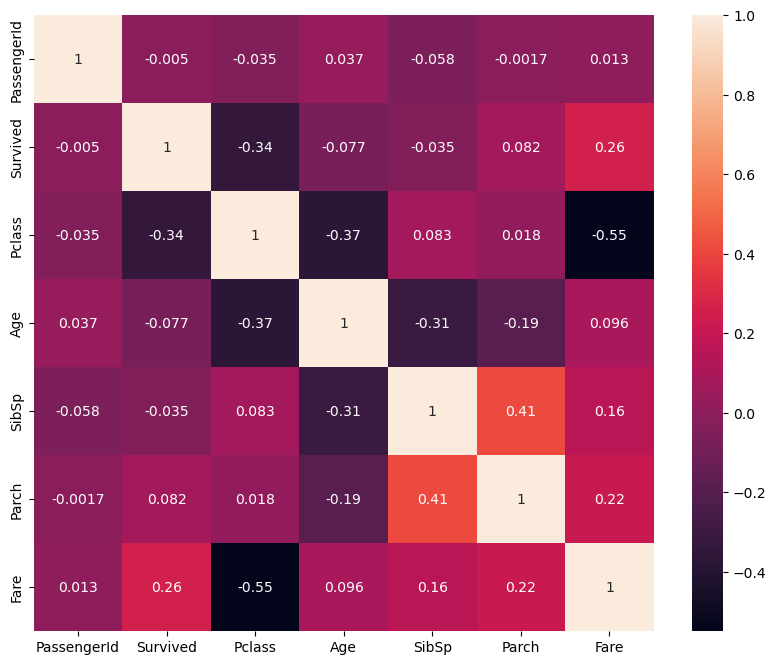

In [8]:
plt.figure(figsize = (10, 8))
sns.heatmap(train.corr(), annot = True)

Percentage of Men survived : 18.890814558058924
Percentage of Women survived : 74.20382165605095


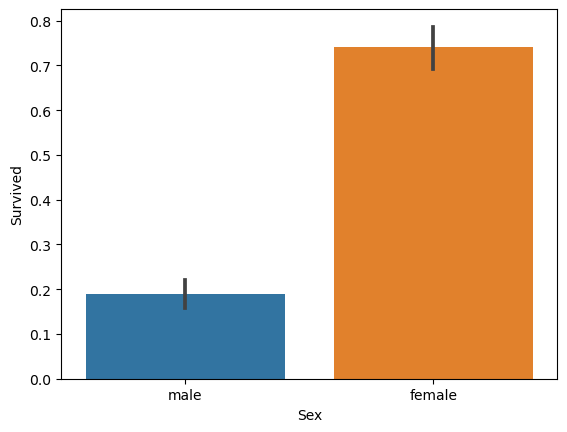

In [9]:
sns.barplot(x='Sex', y='Survived', data=train)

# survival percentage per gender/sex
print('Percentage of Men survived :', train['Survived'][train['Sex']=='male'].value_counts(normalize=True)[1]*100)
print('Percentage of Women survived :', train['Survived'][train['Sex']=='female'].value_counts(normalize=True)[1]*100)

Pclass-1 passenger survival percentage : 62.96296296296296
Pclass-2 passenger survival percentage : 47.28260869565217
Pclass-3 passenger survival percentage : 24.236252545824847


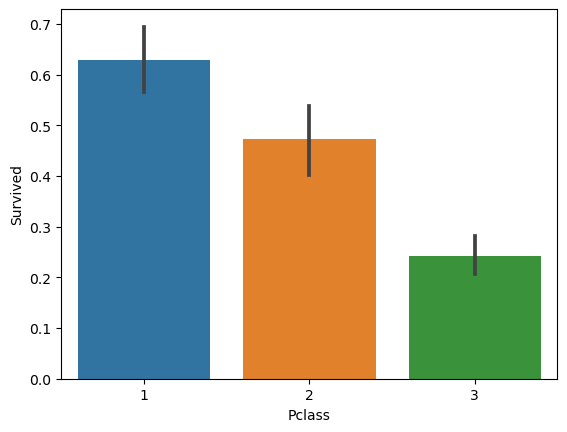

In [10]:
sns.barplot(data=train, x='Pclass', y='Survived')

# survival percentage per Pclass
print('Pclass-1 passenger survival percentage :', train['Survived'][train['Pclass']==1].value_counts(normalize=True)[1]*100)
print('Pclass-2 passenger survival percentage :', train['Survived'][train['Pclass']==2].value_counts(normalize=True)[1]*100)
print('Pclass-3 passenger survival percentage :', train['Survived'][train['Pclass']==3].value_counts(normalize=True)[1]*100)

In [11]:
train.Age = train.Age.fillna(-0.5)
test.Age = test.Age.fillna(-0.5)

In [12]:
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenage', 'Student', 'Young Adult', 'Adult', 'Senior']

In [13]:
train['AgeGroup'] = pd.cut(train['Age'], bins, labels = labels)
test['AgeGroup'] = pd.cut(test['Age'], bins, labels = labels)

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult


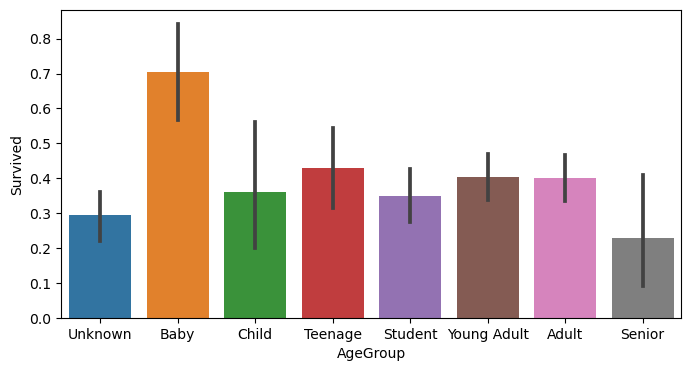

In [15]:
plt.figure(figsize = (8, 4))
sns.barplot(data = train, x = 'AgeGroup', y = 'Survived')
plt.show()

In [16]:
train = train.drop(['Fare', 'Ticket', 'Cabin'], axis = 1)
test = test.drop(['Fare', 'Ticket', 'Cabin'], axis = 1)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult


# <font color='Cyan'>Feature Engineering</font>

In [18]:
sou = train[train['Embarked'] == 'S'].shape[0]
print('No. of passengers embaring in Southampton("S") :', sou)

che = train[train['Embarked'] == 'C'].shape[0]
print('No. of passengers embaring in Cherbourg("C") :', che)

que = train[train['Embarked'] == 'Q'].shape[0]
print('No. of passengers embaring in Queenstown("Q") :', que)

No. of passengers embaring in Southampton("S") : 644
No. of passengers embaring in Cherbourg("C") : 168
No. of passengers embaring in Queenstown("Q") : 77


In [19]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       2
AgeGroup       0
dtype: int64

In [20]:
train = train.fillna({'Embarked' : 'S'})

In [21]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
AgeGroup       0
dtype: int64

In [22]:
combined = [train, test]

for dataset in combined:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
    
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,Mr


In [24]:
for dataset in combined:
    dataset['Title'] = dataset['Title'].replace(['Don', 'Rev', 'Dr', 'Major', 'Col', 'Capt', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.250000
5,Royal,1.000000


In [25]:
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Royal':5, 'Rare':6}

for dataset in combined:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,1


In [27]:
mr_age = train[train['Title']==1]['AgeGroup'].mode()
miss_age = train[train['Title']==2]['AgeGroup'].mode()
mrs_age = train[train['Title']==3]['AgeGroup'].mode()
master_age = train[train['Title']==4]['AgeGroup'].mode()
royal_age = train[train['Title']==5]['AgeGroup'].mode()
rare_age = train[train['Title']==6]['AgeGroup'].mode()

In [28]:
mr_age[0], miss_age[0], mrs_age[0], master_age[0], royal_age[0], rare_age[0]

('Young Adult', 'Unknown', 'Adult', 'Baby', 'Adult', 'Adult')

In [29]:
age_title_map = {1 : 'Young Adult', 2 : 'Student', 3 : 'Adult', 4 : 'Baby', 5 : 'Adult', 6 : 'Adult'}

for i in range(len(train['AgeGroup'])):
    if train['AgeGroup'][i] == 'Unknown':
        train['AgeGroup'][i] = age_title_map[train['Title'][i]]
        
for i in range(len(test['AgeGroup'])):
    if test['AgeGroup'][i] == 'Unknown':
        test['AgeGroup'][i] = age_title_map[test['Title'][i]]

In [30]:
train.AgeGroup.unique()

['Student', 'Adult', 'Young Adult', 'Baby', 'Teenage', 'Child', 'Senior']
Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenage' < 'Student' < 'Young Adult' < 'Adult' < 'Senior']

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,1


In [32]:
le = LabelEncoder()

In [33]:
transform = ['Sex', 'Embarked', 'AgeGroup']

for i in transform:
    train[i] = le.fit_transform(train[i])

for i in transform:
    test[i] = le.fit_transform(test[i])

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,2,4,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,0,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,2,6,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,2,6,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,2,6,1


In [35]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,1,6,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,2,0,3
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,1,3,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,2,6,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,2,4,3


# <font color='Cyan'>Preparing Training & Testing Data</font>

In [36]:
x_train = train.drop(['PassengerId', 'Name', 'Survived'], axis = 1)
y_train = train['Survived']
x_test = test.drop(['PassengerId', 'Name'], axis = 1)

In [37]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,3,1,22.0,1,0,2,4,1
1,1,0,38.0,1,0,0,0,3
2,3,0,26.0,0,0,2,6,2
3,1,0,35.0,1,0,2,6,3
4,3,1,35.0,0,0,2,6,1


In [38]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [39]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,3,1,34.5,0,0,1,6,1
1,3,0,47.0,1,0,2,0,3
2,2,1,62.0,0,0,1,3,1
3,3,1,27.0,0,0,2,6,1
4,3,0,22.0,1,1,2,4,3


# <font color='Cyan'>Machine Learning Model</font>

In [40]:
lr = LogisticRegression()

In [41]:
lr.fit(x_train, y_train)

LogisticRegression()

In [42]:
y_preds = lr.predict(x_test)

In [43]:
y_preds

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [44]:
ids = test['PassengerId']

In [45]:
output = pd.DataFrame({'PassengerId' : ids, 'Survived' : y_preds})
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [46]:
output.to_csv('Survived Passengers Predicton.csv', index = False)

In [47]:
df = pd.read_csv('Survived Passengers Predicton.csv')

In [48]:
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
